In [1]:
cd ../..

D:\Users\mrefoyo\Proyectos\Sub-SpaCE_plus


In [2]:
import os
import pickle
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tensorflow as tf

from experiments.evaluation.evaluation_utils import load_dataset_for_eval, calculate_metrics_for_dataset

print(tf.__version__)

2.13.0


In [60]:
# datasets = ['CBF', 'chinatown', 'coffee', 'gunpoint', 'ECG200']
DATASETS = ["BasicMotions", "NATOPS", "UWaveGestureLibrary"]
methods = {
    # Basic experimentos
    # "43b17a2e4f21097540adf8600402c5bd32fa60d6": "subspace_gknn_gch",
    # "37a3f06c077321b95960769282152427a7ee48ae": "subspace_gknn_ich", 
    # "86df14d56b66fecfb65d5805107dfe10961ecae9": "subspace_iknn_gch",     
    # "4f40e39bfe0d3da692b5571d87f7ec915c42eba2": "subspace_iknn_ich", 
    
    # Basic experiments only gknn but with lower gamma (0.125)
    # "4d1faa458bab2b8c6ee14d59b824557fcc80d8e3": "subspace_gknn_gch_gamma0125", 
    # "93c0b5f0630a5dbf5d0377a4f3ff03b6868cbda1": "subspace_iknn_gch_gamma0125", 
    
    # Basic experiments New IoS 
    # "e54dcb25b02132166a719885cad2695540450ee6": "subspace_gknn_gch_ios",
    # "9cdb2fb25d7c664d60da7aa23b4c2c0f9ec9548c": "subspace_gknn_ich_ios",
    # "8c29354f168b9852a05523a7c26ab0f4acb30e9b": "subspace_iknn_gch_ios",
    # "b93fe63854fe36f62900cbcae1c00ad499d41f74": "subspace_iknn_ich_ios",
    
    # Sub-SpaCE v2 para fine tuning con optimizacion con canales independientes
    # "316686353c28547589d494bcc886c8334329b14e": "subspace_gknn_gch",
    # "0f31693cb3d17afd3d67191e82e2bca887075ee6": "subspace_gknn_gch_moremut",
    # "76f8a8271b7ba6d171b7383bce7bbf4d9286d78c": "subspace_gknn_gch_moreit",
    # "bba03e82f6c718e1466a06087dd99606de229b40": "subspace_gknn_ich",
    # "a246def090b506ff8ba41e861e0464493233b9d1": "subspace_gknn_ich_moremut",
    # "d3b12b6ac5e2ab4e68901859273a55edb14d5590": "subspace_gknn_ich_moreit",
    # "cfbb6793595875fa49b7becafefa2ff2df33a2f6": "subspace_gknn_cch",
    # "e4a8da55a30853287350d3540873bcb91cb50b70": "subspace_gknn_cch_moremut",
    # "fe0be96f08c5d37950f7ae2c50d7f81fc050c185": "subspace_gknn_cch_moreit",
    
    # Sub-SpaCE v2 con NUN sinteticos
    # "0f31693cb3d17afd3d67191e82e2bca887075ee6": "subspace_gknn_gch_moremut",
    # "988e9ee7e36478e6b02628f6fd15e8f6fdabce63": "subspace_iknn_gch_moremut",
    # "a246def090b506ff8ba41e861e0464493233b9d1": "subspace_gknn_ich_moremut",
    # "de59140e133b8214d6fd39630d49420f41f2f395": "subspace_iknn_ich_moremut",
    # "e4a8da55a30853287350d3540873bcb91cb50b70": "subspace_gknn_cch_moremut",
    # "af3bb75a4e9d84bc4cb545b21941e6750ce17b45": "subspace_iknn_cch_moremut",
    
    # Sub-SpaCE v2 mutation study
    "a39f776a35cfd7c4530ed4c8f104fcef9b650512": "subspace_gknn_ich_mut01",
    "99b876d673ecb07aa65860859a2f6467617b8c86": "subspace_gknn_gch_mut01",
    "7469da9fdf840b4b4c2b38bc4bc9111016b32de5": "subspace_gknn_cch_mut01",
    "db736bc9c4068ecbfbc96a90e98dc0eb3efbaa92": "subspace_gknn_ich_mut02",
    "cbbcedcb6d9fd15f864bcc72209e990664f578cc": "subspace_gknn_gch_mut02",
    "3a2f5d028e5e5ee1637634010ddab48db711879f": "subspace_gknn_cch_mut02",
    "e702bb244e58da0e7ebbc277bb04c45fb09118aa": "subspace_gknn_ich_mut04",
    "5643e1c660ae69f41f58f9b71109809ac41d806a": "subspace_gknn_gch_mut04",
    "d3103c82728b7e2d32be72d2c3029c225869b952": "subspace_gknn_cch_mut04",
    "6a1225fc4657ca27a9d23ed21050b2fb890175c3": "subspace_gknn_ich_mut05",
    "41f42efc9de796a8dafc08265dc029d606e452cf": "subspace_gknn_gch_mut05",
    "2a7b2e8d4df37d7d7ece4e9b45999a3679252362": "subspace_gknn_cch_mut05",
    "14f1a162dc03f18a16cb1044efd076f3a4fb61a2": "subspace_gknn_ich_mut07",
    "e76bb3c93b88f711dd5d25a3ac5704c3bf98b4cf": "subspace_gknn_gch_mut07",
    "e58d4a60e2c54feed0add715c4c3b28afbb37969": "subspace_gknn_cch_mut07",
    "6d734428c0fea87d3327bea1408b47c483d33e9e": "subspace_gknn_ich_mut09",
    "e347534c7eb328d5ddafe940f724a02f9a14ec80": "subspace_gknn_gch_mut09",
    "b945f3452ca7deb539f84c45d6c6202e75563c55": "subspace_gknn_cch_mut09",
}

# Get results

In [61]:
# Data and aux data dict
data_dict = {}
models_dict = {}
outlier_calculators_dict = {}
possible_nuns_dict = {}
desired_classes_dict = {}
original_classes_dict = {}

# Results dicts
mean_results_dict = {}
methods_cfs_dict = {}
results_all_datasets_df = pd.DataFrame()
common_test_indexes_dict = {}

# Iterate through datasets
for dataset in DATASETS:
    print(f'Calculating metrics for {dataset}')
    # Load all info needed to get the counterfactual
    data_tuple, original_classes, model, outlier_calculator, possible_nuns, desired_classes = load_dataset_for_eval(dataset)
    data_dict[dataset] = data_tuple
    models_dict[dataset] = model
    outlier_calculators_dict[dataset] = outlier_calculator
    possible_nuns_dict[dataset] = possible_nuns
    desired_classes_dict[dataset] = desired_classes
    original_classes_dict[dataset] = original_classes

    # Get the metrics for all methods
    dataset_mean_std_df, dataset_results_df, method_cfs_dataset, common_test_indexes = calculate_metrics_for_dataset(
        dataset, methods,
        data_tuple, original_classes, model, outlier_calculator, possible_nuns
    )
    mean_results_dict[dataset] = dataset_mean_std_df
    methods_cfs_dict[dataset] = method_cfs_dataset
    results_all_datasets_df = pd.concat([results_all_datasets_df, dataset_results_df])
    common_test_indexes_dict[dataset] = common_test_indexes

    # Store results
    dataset_mean_std_df.to_csv(f'./experiments/evaluation/results_mean_metrics_{dataset}.csv', sep=";", index=False)

# Store all results
results_all_datasets_df.to_csv(f'./experiments/evaluation/results_all.csv', sep=";", index=False)


Calculating metrics for BasicMotions
14f1a162dc03f18a16cb1044efd076f3a4fb61a2


100%|██████████| 40/40 [00:01<00:00, 20.57it/s]


2a7b2e8d4df37d7d7ece4e9b45999a3679252362


100%|██████████| 40/40 [00:01<00:00, 20.53it/s]


3a2f5d028e5e5ee1637634010ddab48db711879f


100%|██████████| 40/40 [00:01<00:00, 20.40it/s]


41f42efc9de796a8dafc08265dc029d606e452cf


100%|██████████| 40/40 [00:01<00:00, 20.31it/s]


5643e1c660ae69f41f58f9b71109809ac41d806a


100%|██████████| 40/40 [00:02<00:00, 13.99it/s]


6a1225fc4657ca27a9d23ed21050b2fb890175c3


100%|██████████| 40/40 [00:01<00:00, 20.64it/s]


6d734428c0fea87d3327bea1408b47c483d33e9e


100%|██████████| 40/40 [00:01<00:00, 20.16it/s]


7469da9fdf840b4b4c2b38bc4bc9111016b32de5


100%|██████████| 40/40 [00:01<00:00, 20.98it/s]


99b876d673ecb07aa65860859a2f6467617b8c86


100%|██████████| 40/40 [00:02<00:00, 19.25it/s]


a39f776a35cfd7c4530ed4c8f104fcef9b650512


100%|██████████| 40/40 [00:02<00:00, 18.79it/s]


b945f3452ca7deb539f84c45d6c6202e75563c55


100%|██████████| 40/40 [00:02<00:00, 18.50it/s]


cbbcedcb6d9fd15f864bcc72209e990664f578cc


100%|██████████| 40/40 [00:02<00:00, 19.54it/s]


d3103c82728b7e2d32be72d2c3029c225869b952


100%|██████████| 40/40 [00:02<00:00, 19.25it/s]


db736bc9c4068ecbfbc96a90e98dc0eb3efbaa92


100%|██████████| 40/40 [00:02<00:00, 18.68it/s]


e347534c7eb328d5ddafe940f724a02f9a14ec80


100%|██████████| 40/40 [00:02<00:00, 18.82it/s]


e58d4a60e2c54feed0add715c4c3b28afbb37969


100%|██████████| 40/40 [00:02<00:00, 19.52it/s]


e702bb244e58da0e7ebbc277bb04c45fb09118aa


100%|██████████| 40/40 [00:02<00:00, 19.28it/s]


e76bb3c93b88f711dd5d25a3ac5704c3bf98b4cf


100%|██████████| 40/40 [00:02<00:00, 19.25it/s]


Calculating metrics for NATOPS
14f1a162dc03f18a16cb1044efd076f3a4fb61a2


100%|██████████| 100/100 [00:05<00:00, 19.55it/s]


2a7b2e8d4df37d7d7ece4e9b45999a3679252362


100%|██████████| 100/100 [00:05<00:00, 18.92it/s]


3a2f5d028e5e5ee1637634010ddab48db711879f


100%|██████████| 100/100 [00:05<00:00, 18.69it/s]


41f42efc9de796a8dafc08265dc029d606e452cf


100%|██████████| 100/100 [00:05<00:00, 19.10it/s]


5643e1c660ae69f41f58f9b71109809ac41d806a


100%|██████████| 100/100 [00:05<00:00, 19.63it/s]


6a1225fc4657ca27a9d23ed21050b2fb890175c3


100%|██████████| 100/100 [00:05<00:00, 19.70it/s]


6d734428c0fea87d3327bea1408b47c483d33e9e


100%|██████████| 100/100 [00:05<00:00, 19.73it/s]


7469da9fdf840b4b4c2b38bc4bc9111016b32de5


100%|██████████| 100/100 [00:05<00:00, 19.77it/s]


99b876d673ecb07aa65860859a2f6467617b8c86


100%|██████████| 100/100 [00:05<00:00, 19.91it/s]


a39f776a35cfd7c4530ed4c8f104fcef9b650512


100%|██████████| 100/100 [00:05<00:00, 19.87it/s]


b945f3452ca7deb539f84c45d6c6202e75563c55


100%|██████████| 100/100 [00:05<00:00, 18.60it/s]


cbbcedcb6d9fd15f864bcc72209e990664f578cc


100%|██████████| 100/100 [00:05<00:00, 19.17it/s]


d3103c82728b7e2d32be72d2c3029c225869b952


100%|██████████| 100/100 [00:05<00:00, 19.09it/s]


db736bc9c4068ecbfbc96a90e98dc0eb3efbaa92


100%|██████████| 100/100 [00:05<00:00, 19.26it/s]


e347534c7eb328d5ddafe940f724a02f9a14ec80


100%|██████████| 100/100 [00:05<00:00, 19.67it/s]


e58d4a60e2c54feed0add715c4c3b28afbb37969


100%|██████████| 100/100 [00:05<00:00, 19.62it/s]


e702bb244e58da0e7ebbc277bb04c45fb09118aa


100%|██████████| 100/100 [00:05<00:00, 19.39it/s]


e76bb3c93b88f711dd5d25a3ac5704c3bf98b4cf


100%|██████████| 100/100 [00:05<00:00, 19.49it/s]


Calculating metrics for UWaveGestureLibrary
14f1a162dc03f18a16cb1044efd076f3a4fb61a2


100%|██████████| 100/100 [00:05<00:00, 19.57it/s]


2a7b2e8d4df37d7d7ece4e9b45999a3679252362


100%|██████████| 100/100 [00:05<00:00, 19.39it/s]


3a2f5d028e5e5ee1637634010ddab48db711879f


100%|██████████| 100/100 [00:05<00:00, 19.33it/s]


41f42efc9de796a8dafc08265dc029d606e452cf


100%|██████████| 100/100 [00:05<00:00, 18.89it/s]


5643e1c660ae69f41f58f9b71109809ac41d806a


100%|██████████| 100/100 [00:05<00:00, 19.33it/s]


6a1225fc4657ca27a9d23ed21050b2fb890175c3


100%|██████████| 100/100 [00:05<00:00, 19.05it/s]


6d734428c0fea87d3327bea1408b47c483d33e9e


100%|██████████| 100/100 [00:05<00:00, 18.65it/s]


7469da9fdf840b4b4c2b38bc4bc9111016b32de5


100%|██████████| 100/100 [00:05<00:00, 18.52it/s]


99b876d673ecb07aa65860859a2f6467617b8c86


100%|██████████| 100/100 [00:05<00:00, 17.88it/s]


a39f776a35cfd7c4530ed4c8f104fcef9b650512


100%|██████████| 100/100 [00:05<00:00, 18.17it/s]


b945f3452ca7deb539f84c45d6c6202e75563c55


100%|██████████| 100/100 [00:05<00:00, 18.82it/s]


cbbcedcb6d9fd15f864bcc72209e990664f578cc


100%|██████████| 100/100 [00:05<00:00, 19.26it/s]


d3103c82728b7e2d32be72d2c3029c225869b952


100%|██████████| 100/100 [00:05<00:00, 19.69it/s]


db736bc9c4068ecbfbc96a90e98dc0eb3efbaa92


100%|██████████| 100/100 [00:05<00:00, 19.41it/s]


e347534c7eb328d5ddafe940f724a02f9a14ec80


100%|██████████| 100/100 [00:05<00:00, 19.67it/s]


e58d4a60e2c54feed0add715c4c3b28afbb37969


100%|██████████| 100/100 [00:05<00:00, 19.49it/s]


e702bb244e58da0e7ebbc277bb04c45fb09118aa


100%|██████████| 100/100 [00:05<00:00, 19.67it/s]


e76bb3c93b88f711dd5d25a3ac5704c3bf98b4cf


100%|██████████| 100/100 [00:05<00:00, 18.29it/s]


In [64]:
from IPython.display import display
for dataset in DATASETS:
    print(dataset)
    display(mean_results_dict[dataset])

BasicMotions


,method,ii,nchanges,sparsity,L1,L2,proba,valid,nuns_valid,outlier_score,increase_outlier_score,subsequences,subsequences %,times
0,subspace_gknn_ich_mut07,19.5 ± 11.69,276.18 ± 141.51,0.46 ± 0.24,954.47 ± 868.4,75.5 ± 54.69,0.8 ± 0.07,1.0 ± 0.0,1.0 ± 0.0,0.26 ± 0.17,0.01 ± 0.03,12.25 ± 4.72,0.04 ± 0.02,29.66 ± 8.65
1,subspace_gknn_cch_mut05,19.5 ± 11.69,282.27 ± 116.62,0.47 ± 0.19,918.33 ± 789.84,73.93 ± 52.55,0.78 ± 0.08,1.0 ± 0.0,1.0 ± 0.0,0.25 ± 0.15,0.01 ± 0.02,8.65 ± 3.93,0.03 ± 0.01,25.3 ± 6.64
2,subspace_gknn_cch_mut02,19.5 ± 11.69,264.35 ± 123.72,0.44 ± 0.21,851.66 ± 726.55,71.28 ± 50.22,0.77 ± 0.08,1.0 ± 0.0,1.0 ± 0.0,0.27 ± 0.17,0.01 ± 0.02,10.95 ± 4.65,0.04 ± 0.02,24.73 ± 5.89
3,subspace_gknn_gch_mut05,19.5 ± 11.69,280.05 ± 116.81,0.47 ± 0.19,874.06 ± 735.66,71.84 ± 50.66,0.74 ± 0.1,1.0 ± 0.0,1.0 ± 0.0,0.25 ± 0.16,0.01 ± 0.02,9.3 ± 4.5,0.03 ± 0.01,26.28 ± 7.7
4,subspace_gknn_gch_mut04,19.5 ± 11.69,286.2 ± 124.68,0.48 ± 0.21,901.17 ± 788.62,73.24 ± 52.29,0.74 ± 0.09,1.0 ± 0.0,1.0 ± 0.0,0.24 ± 0.16,0.01 ± 0.02,9.15 ± 4.9,0.03 ± 0.02,24.78 ± 6.16
5,subspace_gknn_ich_mut05,19.5 ± 11.69,292.05 ± 136.28,0.49 ± 0.23,987.01 ± 861.89,76.82 ± 54.68,0.82 ± 0.08,1.0 ± 0.0,1.0 ± 0.0,0.26 ± 0.16,0.02 ± 0.03,13.68 ± 4.33,0.05 ± 0.01,27.94 ± 7.74
6,subspace_gknn_ich_mut09,19.5 ± 11.69,247.62 ± 143.67,0.41 ± 0.24,866.86 ± 806.0,72.37 ± 52.85,0.77 ± 0.11,1.0 ± 0.0,1.0 ± 0.0,0.29 ± 0.18,0.01 ± 0.02,16.73 ± 12.67,0.06 ± 0.04,29.86 ± 8.81
7,subspace_gknn_cch_mut01,19.5 ± 11.69,260.95 ± 125.63,0.43 ± 0.21,876.35 ± 787.63,72.61 ± 52.28,0.77 ± 0.1,1.0 ± 0.0,1.0 ± 0.0,0.26 ± 0.16,0.01 ± 0.02,12.68 ± 4.64,0.04 ± 0.02,25.4 ± 6.69
8,subspace_gknn_gch_mut01,19.5 ± 11.69,266.7 ± 121.73,0.44 ± 0.2,852.04 ± 725.93,71.41 ± 50.21,0.74 ± 0.09,1.0 ± 0.0,1.0 ± 0.0,0.26 ± 0.16,0.01 ± 0.02,12.75 ± 5.47,0.04 ± 0.02,24.4 ± 6.32
9,subspace_gknn_ich_mut01,19.5 ± 11.69,288.4 ± 133.07,0.48 ± 0.22,952.01 ± 836.35,75.52 ± 53.86,0.81 ± 0.08,1.0 ± 0.0,1.0 ± 0.0,0.28 ± 0.16,0.02 ± 0.03,25.12 ± 7.58,0.08 ± 0.03,27.03 ± 6.84


NATOPS


,method,ii,nchanges,sparsity,L1,L2,proba,valid,nuns_valid,outlier_score,increase_outlier_score,subsequences,subsequences %,times
0,subspace_gknn_ich_mut07,87.18 ± 53.72,261.96 ± 188.42,0.21 ± 0.15,140.47 ± 131.02,9.84 ± 6.81,0.94 ± 0.08,1.0 ± 0.0,1.0 ± 0.0,0.64 ± 0.23,0.06 ± 0.1,26.63 ± 32.93,0.04 ± 0.05,35.06 ± 11.13
1,subspace_gknn_cch_mut05,87.18 ± 53.72,323.93 ± 160.33,0.26 ± 0.13,163.64 ± 135.39,10.75 ± 6.87,0.97 ± 0.03,1.0 ± 0.0,1.0 ± 0.0,0.59 ± 0.19,0.02 ± 0.04,23.18 ± 4.07,0.04 ± 0.01,27.64 ± 6.34
2,subspace_gknn_cch_mut02,87.18 ± 53.72,322.35 ± 155.95,0.26 ± 0.13,161.01 ± 131.49,10.68 ± 6.79,0.96 ± 0.03,1.0 ± 0.0,1.0 ± 0.0,0.59 ± 0.19,0.02 ± 0.04,24.13 ± 4.48,0.04 ± 0.01,27.92 ± 5.84
3,subspace_gknn_gch_mut05,87.18 ± 53.72,329.76 ± 158.05,0.27 ± 0.13,163.45 ± 136.53,10.67 ± 6.96,0.9 ± 0.09,1.0 ± 0.0,1.0 ± 0.0,0.59 ± 0.18,0.03 ± 0.05,24.48 ± 3.38,0.04 ± 0.01,28.37 ± 7.11
4,subspace_gknn_gch_mut04,87.18 ± 53.72,326.16 ± 155.91,0.27 ± 0.13,161.45 ± 133.08,10.63 ± 6.87,0.9 ± 0.1,1.0 ± 0.0,1.0 ± 0.0,0.59 ± 0.19,0.03 ± 0.05,24.48 ± 3.38,0.04 ± 0.01,27.28 ± 6.46
5,subspace_gknn_ich_mut05,87.18 ± 53.72,292.03 ± 184.12,0.24 ± 0.15,149.18 ± 129.75,10.22 ± 6.67,0.95 ± 0.05,1.0 ± 0.0,1.0 ± 0.0,0.64 ± 0.23,0.06 ± 0.09,27.04 ± 12.49,0.04 ± 0.02,32.94 ± 10.53
6,subspace_gknn_ich_mut09,87.18 ± 53.72,228.67 ± 177.31,0.19 ± 0.14,122.16 ± 117.72,9.21 ± 6.34,0.89 ± 0.14,1.0 ± 0.0,1.0 ± 0.0,0.67 ± 0.26,0.08 ± 0.11,43.04 ± 71.68,0.07 ± 0.12,35.0 ± 11.02
7,subspace_gknn_cch_mut01,87.18 ± 53.72,320.02 ± 157.37,0.26 ± 0.13,160.88 ± 134.36,10.65 ± 6.84,0.96 ± 0.03,1.0 ± 0.0,1.0 ± 0.0,0.59 ± 0.19,0.02 ± 0.04,24.71 ± 4.08,0.04 ± 0.01,27.88 ± 6.82
8,subspace_gknn_gch_mut01,87.18 ± 53.72,331.68 ± 157.6,0.27 ± 0.13,164.47 ± 136.37,10.7 ± 6.95,0.91 ± 0.08,1.0 ± 0.0,1.0 ± 0.0,0.59 ± 0.18,0.02 ± 0.04,24.96 ± 4.73,0.04 ± 0.01,27.57 ± 6.69
9,subspace_gknn_ich_mut01,87.18 ± 53.72,373.24 ± 170.53,0.3 ± 0.14,163.12 ± 131.96,10.49 ± 6.6,0.95 ± 0.07,1.0 ± 0.0,1.0 ± 0.0,0.66 ± 0.23,0.07 ± 0.1,65.45 ± 27.26,0.11 ± 0.04,32.21 ± 8.46


UWaveGestureLibrary


,method,ii,nchanges,sparsity,L1,L2,proba,valid,nuns_valid,outlier_score,increase_outlier_score,subsequences,subsequences %,times
0,subspace_gknn_ich_mut07,159.0 ± 87.23,298.15 ± 135.13,0.32 ± 0.14,277.7 ± 124.56,18.97 ± 5.31,0.89 ± 0.07,1.0 ± 0.0,1.0 ± 0.0,0.68 ± 0.16,0.04 ± 0.06,7.29 ± 3.73,0.02 ± 0.01,56.7 ± 17.47
1,subspace_gknn_cch_mut05,159.0 ± 87.23,292.4 ± 118.69,0.31 ± 0.13,271.43 ± 115.59,18.87 ± 4.92,0.87 ± 0.08,1.0 ± 0.0,1.0 ± 0.0,0.67 ± 0.15,0.03 ± 0.05,6.02 ± 2.37,0.01 ± 0.01,52.9 ± 13.55
2,subspace_gknn_cch_mut02,159.0 ± 87.23,314.31 ± 135.75,0.33 ± 0.14,287.94 ± 126.98,19.44 ± 5.27,0.89 ± 0.08,1.0 ± 0.0,1.0 ± 0.0,0.68 ± 0.15,0.03 ± 0.05,7.25 ± 2.81,0.02 ± 0.01,49.55 ± 11.65
3,subspace_gknn_gch_mut05,159.0 ± 87.23,302.82 ± 113.74,0.32 ± 0.12,272.99 ± 109.55,18.88 ± 4.82,0.87 ± 0.07,1.0 ± 0.0,1.0 ± 0.0,0.67 ± 0.16,0.03 ± 0.05,6.42 ± 2.7,0.01 ± 0.01,51.71 ± 13.67
4,subspace_gknn_gch_mut04,159.0 ± 87.23,309.51 ± 123.78,0.33 ± 0.13,280.76 ± 119.01,19.16 ± 5.01,0.87 ± 0.08,1.0 ± 0.0,1.0 ± 0.0,0.67 ± 0.15,0.03 ± 0.05,6.6 ± 2.73,0.01 ± 0.01,50.76 ± 13.84
5,subspace_gknn_ich_mut05,159.0 ± 87.23,303.22 ± 131.29,0.32 ± 0.14,284.51 ± 122.53,19.33 ± 5.11,0.89 ± 0.08,1.0 ± 0.0,1.0 ± 0.0,0.68 ± 0.18,0.04 ± 0.11,9.19 ± 21.66,0.02 ± 0.05,53.95 ± 13.55
6,subspace_gknn_ich_mut09,159.0 ± 87.23,289.24 ± 140.59,0.31 ± 0.15,259.51 ± 125.08,18.17 ± 5.32,0.79 ± 0.15,1.0 ± 0.0,1.0 ± 0.0,0.84 ± 0.29,0.19 ± 0.27,45.62 ± 75.7,0.1 ± 0.16,57.54 ± 17.5
7,subspace_gknn_cch_mut01,159.0 ± 87.23,312.5 ± 134.83,0.33 ± 0.14,278.53 ± 127.7,18.82 ± 5.3,0.87 ± 0.09,1.0 ± 0.0,1.0 ± 0.0,0.69 ± 0.16,0.04 ± 0.06,8.78 ± 4.22,0.02 ± 0.01,49.97 ± 11.0
8,subspace_gknn_gch_mut01,159.0 ± 87.23,316.47 ± 130.71,0.33 ± 0.14,286.25 ± 126.72,19.25 ± 5.36,0.87 ± 0.09,1.0 ± 0.0,1.0 ± 0.0,0.68 ± 0.15,0.03 ± 0.05,7.89 ± 3.38,0.02 ± 0.01,50.3 ± 12.88
9,subspace_gknn_ich_mut01,159.0 ± 87.23,345.59 ± 152.6,0.37 ± 0.16,305.32 ± 140.33,19.74 ± 5.52,0.9 ± 0.06,1.0 ± 0.0,1.0 ± 0.0,0.73 ± 0.15,0.08 ± 0.09,15.91 ± 8.88,0.03 ± 0.02,50.59 ± 12.12


In [65]:
columns = ["nchanges", "L2", "valid", "increase_outlier_score", "subsequences", "times"]
for dataset in DATASETS:
    print(dataset)
    display(mean_results_dict[dataset].set_index("method").sort_index()[columns])

BasicMotions


,nchanges,L2,valid,increase_outlier_score,subsequences,times
method,,,,,,
subspace_gknn_cch_mut01,260.95 ± 125.63,72.61 ± 52.28,1.0 ± 0.0,0.01 ± 0.02,12.68 ± 4.64,25.4 ± 6.69
subspace_gknn_cch_mut02,264.35 ± 123.72,71.28 ± 50.22,1.0 ± 0.0,0.01 ± 0.02,10.95 ± 4.65,24.73 ± 5.89
subspace_gknn_cch_mut04,269.62 ± 121.82,71.76 ± 51.24,1.0 ± 0.0,0.01 ± 0.02,9.12 ± 3.98,24.4 ± 5.78
subspace_gknn_cch_mut05,282.27 ± 116.62,73.93 ± 52.55,1.0 ± 0.0,0.01 ± 0.02,8.65 ± 3.93,25.3 ± 6.64
subspace_gknn_cch_mut07,262.88 ± 127.22,73.07 ± 53.49,1.0 ± 0.0,0.01 ± 0.02,8.88 ± 4.17,25.85 ± 7.55
subspace_gknn_cch_mut09,224.45 ± 117.44,70.56 ± 51.64,1.0 ± 0.0,0.01 ± 0.02,9.82 ± 4.04,26.84 ± 8.0
subspace_gknn_gch_mut01,266.7 ± 121.73,71.41 ± 50.21,1.0 ± 0.0,0.01 ± 0.02,12.75 ± 5.47,24.4 ± 6.32
subspace_gknn_gch_mut02,270.15 ± 124.87,71.19 ± 50.95,1.0 ± 0.0,0.01 ± 0.02,10.65 ± 4.61,23.99 ± 6.14
subspace_gknn_gch_mut04,286.2 ± 124.68,73.24 ± 52.29,1.0 ± 0.0,0.01 ± 0.02,9.15 ± 4.9,24.78 ± 6.16


NATOPS


,nchanges,L2,valid,increase_outlier_score,subsequences,times
method,,,,,,
subspace_gknn_cch_mut01,320.02 ± 157.37,10.65 ± 6.84,1.0 ± 0.0,0.02 ± 0.04,24.71 ± 4.08,27.88 ± 6.82
subspace_gknn_cch_mut02,322.35 ± 155.95,10.68 ± 6.79,1.0 ± 0.0,0.02 ± 0.04,24.13 ± 4.48,27.92 ± 5.84
subspace_gknn_cch_mut04,322.33 ± 155.49,10.66 ± 6.77,1.0 ± 0.0,0.03 ± 0.04,23.45 ± 4.09,28.11 ± 6.73
subspace_gknn_cch_mut05,323.93 ± 160.33,10.75 ± 6.87,1.0 ± 0.0,0.02 ± 0.04,23.18 ± 4.07,27.64 ± 6.34
subspace_gknn_cch_mut07,324.64 ± 160.13,10.69 ± 6.85,1.0 ± 0.0,0.02 ± 0.04,22.87 ± 4.12,28.5 ± 6.8
subspace_gknn_cch_mut09,323.17 ± 156.62,10.66 ± 6.76,1.0 ± 0.0,0.03 ± 0.04,23.21 ± 7.41,29.41 ± 8.46
subspace_gknn_gch_mut01,331.68 ± 157.6,10.7 ± 6.95,1.0 ± 0.0,0.02 ± 0.04,24.96 ± 4.73,27.57 ± 6.69
subspace_gknn_gch_mut02,326.88 ± 156.91,10.63 ± 6.9,1.0 ± 0.0,0.03 ± 0.05,24.48 ± 3.38,26.08 ± 5.24
subspace_gknn_gch_mut04,326.16 ± 155.91,10.63 ± 6.87,1.0 ± 0.0,0.03 ± 0.05,24.48 ± 3.38,27.28 ± 6.46


UWaveGestureLibrary


,nchanges,L2,valid,increase_outlier_score,subsequences,times
method,,,,,,
subspace_gknn_cch_mut01,312.5 ± 134.83,18.82 ± 5.3,1.0 ± 0.0,0.04 ± 0.06,8.78 ± 4.22,49.97 ± 11.0
subspace_gknn_cch_mut02,314.31 ± 135.75,19.44 ± 5.27,1.0 ± 0.0,0.03 ± 0.05,7.25 ± 2.81,49.55 ± 11.65
subspace_gknn_cch_mut04,309.78 ± 129.22,19.36 ± 5.11,1.0 ± 0.0,0.03 ± 0.05,6.37 ± 2.78,52.48 ± 13.72
subspace_gknn_cch_mut05,292.4 ± 118.69,18.87 ± 4.92,1.0 ± 0.0,0.03 ± 0.05,6.02 ± 2.37,52.9 ± 13.55
subspace_gknn_cch_mut07,280.61 ± 120.05,18.66 ± 4.78,1.0 ± 0.0,0.03 ± 0.05,6.25 ± 2.82,55.52 ± 15.38
subspace_gknn_cch_mut09,252.47 ± 131.45,17.87 ± 5.39,1.0 ± 0.0,0.06 ± 0.08,8.84 ± 6.91,54.94 ± 14.85
subspace_gknn_gch_mut01,316.47 ± 130.71,19.25 ± 5.36,1.0 ± 0.0,0.03 ± 0.05,7.89 ± 3.38,50.3 ± 12.88
subspace_gknn_gch_mut02,311.19 ± 126.64,19.17 ± 5.08,1.0 ± 0.0,0.04 ± 0.06,7.11 ± 2.82,47.86 ± 11.34
subspace_gknn_gch_mut04,309.51 ± 123.78,19.16 ± 5.01,1.0 ± 0.0,0.03 ± 0.05,6.6 ± 2.73,50.76 ± 13.84


# Counterfactual visualization

In [66]:
import math
def plot_comp_cfs(x_orig, possible_nuns, x_cfs_dict):
    
    # Calculate auxiliary variables
    method_names = list(x_cfs_dict.keys())
    x_cfs = list(x_cfs_dict.values())
    length = x_orig.shape[0]
    n_channels = x_orig.shape[1]

    # Define outer grid
    fig = plt.figure(figsize=(22, 16))
    grid_columns = 2
    grid_rows = math.ceil(len(x_cfs) / grid_columns)
    outer_grid = gridspec.GridSpec(grid_rows, grid_columns, wspace=0.1, hspace=0.3)

    # Iterate through outer grid plots
    for m, outer in enumerate(outer_grid):
        try:
            # Get change mask 
            x_cf = x_cfs[m]
            method_name = method_names[m]
            # Get nuns used by the method depending on the name
            if "gknn" in method_name:
                nun_example = possible_nuns["gknn"]
            elif "iknn" in method_name:
                nun_example = possible_nuns["iknn"]
            else:
                raise ValueError('Not detected NUN finding procedure in name. Method name must contain "gknn" or "iknn"')
            found_counterfactual_mask = (x_orig != x_cf.reshape(1, length, n_channels)).astype(int)
            diff_mask = np.diff(found_counterfactual_mask, prepend=0, append=0, axis=1)
        except IndexError:
            break
    
        # Create inner grid
        inner_grid = gridspec.GridSpecFromSubplotSpec(n_channels, 1, wspace=0.2, hspace=0.2, subplot_spec=outer)
        sub_channel_axs = []
        for i in range(n_channels):
            ax = plt.Subplot(fig, inner_grid[i])
            ax.plot(nun_example.reshape(1, length, n_channels)[:, :, i].flatten(), color='grey')
            ax.plot(x_cf.reshape(1, length, n_channels)[:, :, i].flatten(), color='red')
            ax.plot(x_orig.reshape(1, length, n_channels)[:, :, i].flatten(), color="#332288")
            # Set title if first channel
            if i == 0:
                ax.set_title(method_name)
            
            # Add fill to changes
            starts = np.clip( np.where(diff_mask[0, :, i].flatten() == 1)[0] - 1 , 0, length)
            ends = np.where(diff_mask[0, :, i].flatten() == -1)[0]
            # Iterate over the mask segments and fill them with red color
            for i in range(0, len(starts)):
                start_idx = starts[i]
                end_idx = ends[i]
                # plt.fill_between(comp_df.iloc[start_idx:end_idx].index, comp_df.min(), comp_df.max(), color='red', alpha=0.7)
                ax.axvspan(start_idx, end_idx, alpha=0.2, color='red')
            
            # Add ax to list of subplots
            fig.add_subplot(ax)
            sub_channel_axs.append(ax)

    # Plot figure
    fig.legend(
        sub_channel_axs,     # The line objects
        labels=['NUN', 'x_cf', 'x_orig'],   # The labels for each line
        loc='center',
        prop={'size': 12}
    )
    plt.show()



In [70]:
dataset = "UWaveGestureLibrary"
results_all_datasets_df[results_all_datasets_df["dataset"]==dataset]

,ii,nchanges,sparsity,L1,L2,proba,valid,nuns_valid,outlier_score,increase_outlier_score,subsequences,subsequences %,times,method,order,dataset
0,3,218,0.230688,320.932184,24.037385,0.882156,True,True,0.810384,0.030471,7,0.014815,35.666351,subspace_gknn_ich_mut07,1,UWaveGestureLibrary
1,13,355,0.375661,285.134735,19.127925,0.896509,True,True,0.629565,0.008129,7,0.014815,53.722528,subspace_gknn_ich_mut07,1,UWaveGestureLibrary
2,14,31,0.032804,24.673970,4.816993,0.757004,True,True,0.524905,0.006306,1,0.002116,36.111759,subspace_gknn_ich_mut07,1,UWaveGestureLibrary
3,15,182,0.192593,132.375505,11.121709,0.839902,True,True,0.548579,0.034124,11,0.023280,36.483514,subspace_gknn_ich_mut07,1,UWaveGestureLibrary
4,19,281,0.297354,248.198408,19.198177,0.933872,True,True,0.727091,0.020545,9,0.019048,55.941036,subspace_gknn_ich_mut07,1,UWaveGestureLibrary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,300,111,0.117460,103.869483,10.901891,0.844014,True,True,0.502194,0.069585,3,0.006349,44.026507,subspace_gknn_gch_mut07,18,UWaveGestureLibrary
96,302,327,0.346032,384.763495,25.952715,0.878203,True,True,0.603097,0.019400,9,0.019048,63.008536,subspace_gknn_gch_mut07,18,UWaveGestureLibrary
97,303,90,0.095238,97.767240,11.444163,0.751966,True,True,0.580191,0.081189,3,0.006349,41.296222,subspace_gknn_gch_mut07,18,UWaveGestureLibrary
98,314,423,0.447619,418.267269,24.601882,0.775029,True,True,0.750313,0.129067,12,0.025397,77.416649,subspace_gknn_gch_mut07,18,UWaveGestureLibrary


In [71]:
# methods = ["subspace_grouped", "subspace_v2_grouped", "subspace_individual", "subspace_v2_individual"]
common_index_instance = 13

Sample 51: true class [1], x_orig predicted 1, desired_class  6


C:\Users\mrefoyo\AppData\Local\Temp\ipykernel_5304\1304950606.py:61: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(


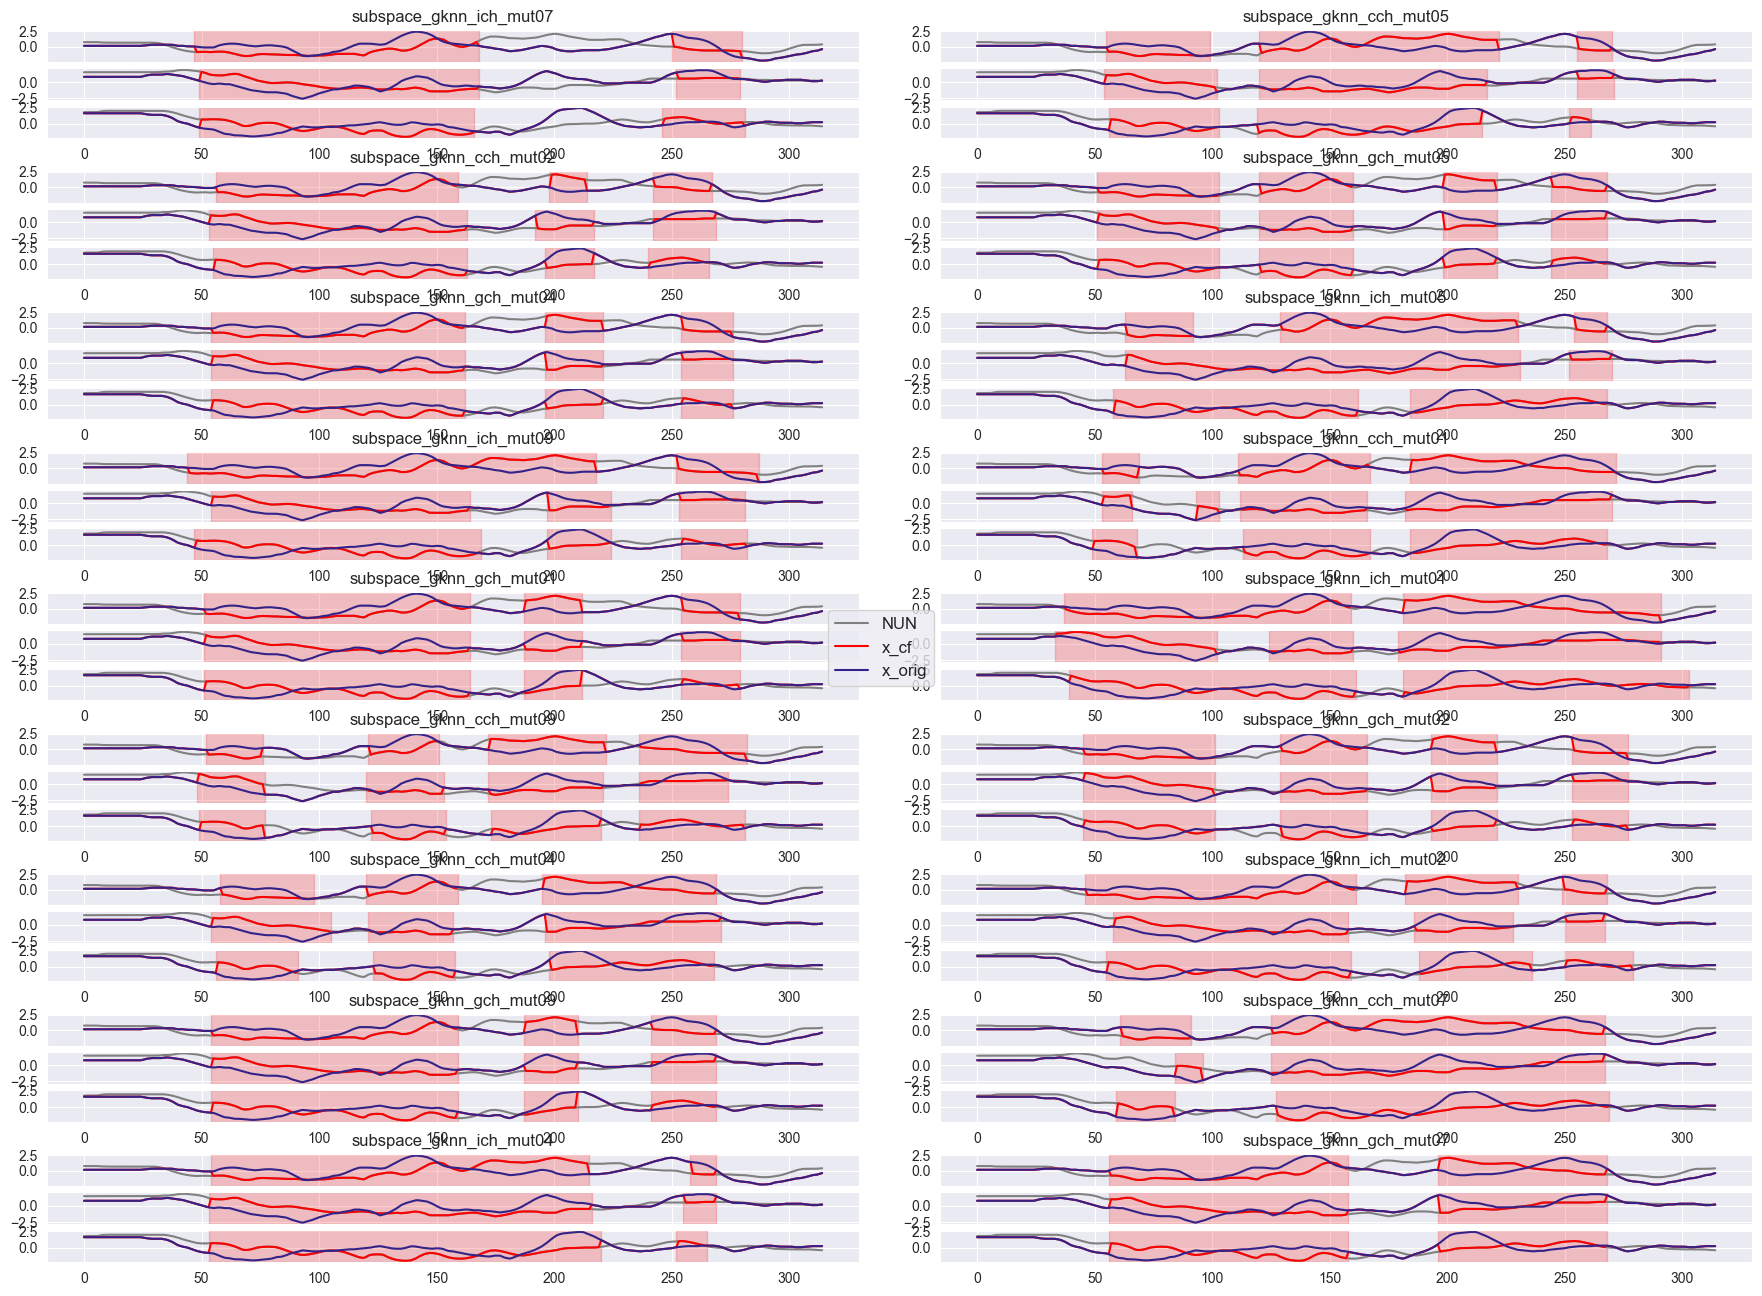

In [72]:
# Get data
X_train, y_train, X_test, y_test = data_dict[dataset]
common_indexes = common_test_indexes_dict[dataset]
instance_index = common_indexes[common_index_instance]

# Get common cfs calculated for all method
x_orig = X_test[instance_index]

# Get possible NUNs
possible_nuns = possible_nuns_dict[dataset]
possible_nuns_instance = {type: possible_nuns[type][instance_index] for type in ["gknn", "iknn"]}

# Get original class and desired class
original_class = original_classes_dict[dataset][instance_index]
desired_class = desired_classes_dict[dataset][instance_index]

# Get the cf calculated for all methods
sol_cfs_methods = methods_cfs_dict[dataset]
sol_cfs_methods = {method: sol_cfs[common_index_instance]['cf'] for method, sol_cfs in sol_cfs_methods.items()}

# Show result
print(f'Sample {instance_index}: true class {y_test[instance_index]}, x_orig predicted {original_class}, desired_class  {desired_class}')
plot_comp_cfs(x_orig, possible_nuns_instance, sol_cfs_methods)


In [ ]:
# Create plot with examples of each method in each dataset

In [ ]:
# CBF: 1, 2, 10, 18, 19
# chinatown: 3, 7, 19
# coffee: 1, 3, 9, 16
# ECG200: 0, 13
# gunpoint: 9, 10, 15 (pesimos en general)
dataset_samples = [('CBF', 2), ('chinatown', 19), ('coffee', 3), ('ECG200', 13), ('gunpoint', 15)]
methods_trad_dict = {"wcf_ng": "W-CF", "ng": "NG", "ab_cf": "AB-CF", "subspace": "Sub-SpaCE"}
methods = list(methods_trad_dict.keys())
include_nun_list = [False, False, False, False]

In [ ]:
from collections import OrderedDict

# Define outer grid
fig = plt.figure(figsize=(16, 6))
grid_rows = len(methods)
grid_columns = len(dataset_samples)
outer_grid = gridspec.GridSpec(grid_rows, grid_columns, wspace=0, hspace=0)

# Iterate through outer grid plots
for i_outer, outer in enumerate(outer_grid):
    i_dataset = i_outer % grid_columns
    dataset, instance = dataset_samples[i_dataset]
    column_title = f'{dataset} instance {instance}'
    
    X_train, y_train, X_test, y_test = data_dict[dataset]
    nuns_idx = nuns_idx_dict[dataset]
    sol_cfs_methods = sol_cfs_dict[dataset]
    sol_cfs_methods = {method: sol_cfs_methods[method][instance]['cf'] for method in methods}

    # Calculate auxiliary variables
    method_names = list(sol_cfs_methods.keys())
    x_cfs = list(sol_cfs_methods.values())
    x_orig = X_test[instance]
    nun_example = X_train[nuns_idx[instance]]
    length = x_orig.shape[0]
    n_channels = x_orig.shape[1]

    # get method m
    m = i_outer // grid_columns
    try:
        # Get change mask 
        x_cf = x_cfs[m]
        method_name = method_names[m]
        found_counterfactual_mask = (x_orig != x_cf.reshape(1, length, n_channels)).astype(int)
        diff_mask = np.diff(found_counterfactual_mask, prepend=0, append=0, axis=1)
    except IndexError:
        break

    # Create inner grid
    inner_grid = gridspec.GridSpecFromSubplotSpec(n_channels, 1, wspace=0, hspace=0, subplot_spec=outer)
    sub_channel_axs = []
    for i in range(n_channels):
        ax = plt.Subplot(fig, inner_grid[i])
        if include_nun_list[m]:
            ax.plot(nun_example.reshape(1, length, n_channels)[:, :, i].flatten(), color='grey')
        ax.plot(x_cf.reshape(1, length, n_channels)[:, :, i].flatten(), color='red')
        ax.plot(x_orig.reshape(1, length, n_channels)[:, :, i].flatten(), color="#332288")
        # ax.axis("off")
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Add fill to changes
        starts = np.clip( np.where(diff_mask[0, :, i].flatten() == 1)[0] - 1 , 0, length)
        ends = np.where(diff_mask[0, :, i].flatten() == -1)[0]
        # Iterate over the mask segments and fill them with red color
        for i in range(0, len(starts)):
            start_idx = starts[i]
            end_idx = ends[i]
            # plt.fill_between(comp_df.iloc[start_idx:end_idx].index, comp_df.min(), comp_df.max(), color='red', alpha=0.7)
            ax.axvspan(start_idx, end_idx, alpha=0.2, color='red')
        
        # Set column titles
        if m == 0:
            ax.set_title(column_title)
        if i_dataset == 0:
            ax.set_ylabel(methods_trad_dict[method_name], size='large')
        # Add ax to list of subplots
        fig.add_subplot(ax)
        sub_channel_axs.append(ax)

# Plot figure
plt.tight_layout()
"""fig.legend(
    sub_channel_axs,     # The line objects
    labels=['$x^n$', 'x', "x'"],   # The labels for each line
    loc='lower center',
    # loc='center right',
    prop={'size': 14},
    ncol=3
)"""
# plt.show()
# plt.savefig('./experiments/results/examples_cfs.png', dpi=300)


In [ ]:
from collections import OrderedDict

# Define outer grid
fig = plt.figure(figsize=(12, 12))
grid_rows = len(dataset_samples)
grid_columns = len(methods)
outer_grid = gridspec.GridSpec(grid_rows, grid_columns, wspace=0, hspace=0)

# Iterate through outer grid plots
for i_outer, outer in enumerate(outer_grid):
    i_dataset = i_outer // grid_columns
    dataset, instance = dataset_samples[i_dataset]
    
    X_train, y_train, X_test, y_test = data_dict[dataset]
    nuns_idx = nuns_idx_dict[dataset]
    sol_cfs_methods = sol_cfs_dict[dataset]
    sol_cfs_methods = {method: sol_cfs_methods[method][instance]['cf'] for method in methods}

    # Calculate auxiliary variables
    method_names = list(sol_cfs_methods.keys())
    x_cfs = list(sol_cfs_methods.values())
    x_orig = X_test[instance]
    nun_example = X_train[nuns_idx[instance]]
    length = x_orig.shape[0]
    n_channels = x_orig.shape[1]

    # get method m
    m = i_outer % grid_columns
    try:
        # Get change mask 
        x_cf = x_cfs[m]
        method_name = method_names[m]
        found_counterfactual_mask = (x_orig != x_cf.reshape(1, length, n_channels)).astype(int)
        diff_mask = np.diff(found_counterfactual_mask, prepend=0, append=0, axis=1)
    except IndexError:
        break
    
    # Create inner grid
    inner_grid = gridspec.GridSpecFromSubplotSpec(n_channels, 1, wspace=0, hspace=0, subplot_spec=outer)
    sub_channel_axs = []
    for i in range(n_channels):
        ax = plt.Subplot(fig, inner_grid[i])
        if include_nun_list[m]:
            ax.plot(nun_example.reshape(1, length, n_channels)[:, :, i].flatten(), color='grey')
        ax.plot(x_cf.reshape(1, length, n_channels)[:, :, i].flatten(), color='red')
        ax.plot(x_orig.reshape(1, length, n_channels)[:, :, i].flatten(), color="#332288")
        # ax.axis("off")
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Add fill to changes
        starts = np.clip( np.where(diff_mask[0, :, i].flatten() == 1)[0] - 1 , 0, length)
        ends = np.where(diff_mask[0, :, i].flatten() == -1)[0]
        # Iterate over the mask segments and fill them with red color
        for i in range(0, len(starts)):
            start_idx = starts[i]
            end_idx = ends[i]
            # plt.fill_between(comp_df.iloc[start_idx:end_idx].index, comp_df.min(), comp_df.max(), color='red', alpha=0.7)
            ax.axvspan(start_idx, end_idx, alpha=0.2, color='red')
        
        # Set column titles
        column_title = methods_trad_dict[method_name]
        # row_title = f'{dataset} \n instance {instance}'
        row_title = f'{dataset} [{instance}]'
        if m == 0:
            ax.set_ylabel(row_title, fontsize=16, rotation=90)
        if i_dataset == 0:
            ax.set_title(column_title, fontsize=18)
            
        # Add ax to list of subplots
        fig.add_subplot(ax)
        sub_channel_axs.append(ax)

# Plot figure
plt.tight_layout()
"""fig.legend(
    sub_channel_axs,     # The line objects
    labels=['$x^n$', 'x', "x'"],   # The labels for each line
    # loc='lower center',
    loc='center right',
    prop={'size': 18},
    ncol=1
)"""
# plt.show()
plt.savefig('./experiments/results/examples_cfs.png', dpi=300)
